![sutd](imgs/sutd.png)
## <center>50.040 Natural Language Processing, Summer 2019<center>
<center>**Homework 2**

<center>**Due 5 July 2019, 5pm** <center>

**Write your student ID and name**

ID: 1002361

Name: Yang Lei

Students with whom you have discussed (if any): Lu LiLi (1002278)

### Requirements:
- Use Python to complete this homework.
- Please list students with whom you have discussed (if any).
- Follow the honor code strictly.
- Submit this ipynb file on eDimension before the deadline.

## Introduction
Constituency parsing aims to extract a constituency-based parse tree from a sentence that represents its syntactic structure according to a phrase structure grammar.

A typical constituency parse tree is shown below:

![tree](imgs/parse_tree.png)

$S$ is a distinguished start symbol, node labels such as $NP$(noun phrase), $VP$(verb phrase) are non-terminal symbols, leaf labels such as "a", "banana" are terminal symbols.

In this homework, we will be implementing a constituency parser based on probabilistic context-free grammars (PCFGs) and evaluate its performance.

## Dataset

We will be using a version of the [Penn Treebank](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.9.8216&rep=rep1&type=pdf) released in [NLTK corpora](http://www.nltk.org/nltk_data/) to induce PCFGs and evaluate our algorithm. 

The preprocessing code has been provided, **do not make any changes to the texts and code unless you are requested to do so.** Run the code below to load the training and test sets as Python lists, it will take ~1 minute.

Since we will not be tuning hyper-parameters for this homework, there will be no need for a development set.

In [1]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/capstone/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [2]:
from util import get_train_test_data

In [3]:
#cnf_trees_train: training set, a list of parse trees
#cnf_trees_test: test set, a list of parse trees
cnf_trees_train, cnf_trees_test = get_train_test_data()

Each parse tree is of the [nltk.tree.Tree](https://www.nltk.org/_modules/nltk/tree.html) type and has been converted to the Chomsky normal form. Let us look at a sample parse tree in the training set:

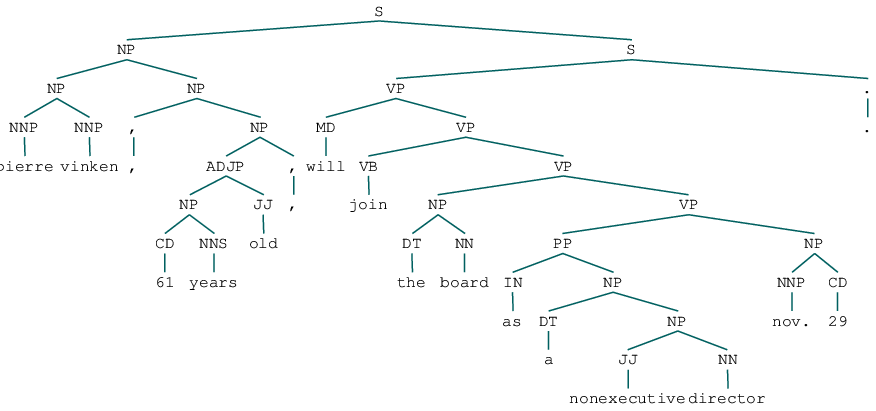

In [4]:
cnf_trees_train[0]

## PCFG

A probabilistic context-free grammar consists of:
- A context-free grammar $G=(N, \ \Sigma, \ S, \ R)$ where $N$ is a finite set of non-terminal symbols, $\Sigma$ is a finite set of terminal symbols, $R$ is a finite set of rules (e.g., $NP \rightarrow NP \ PP$), $S \in N$ is the start symbol.
- One parameter $q(A \rightarrow \beta)$ for each rule $A \rightarrow \beta$ in $R$. Since the grammar is in Chomsky normal form, there are only two types of rules: $A \rightarrow B \ C$ and $A \rightarrow \alpha$, where $A$, $B$, $C \in N$, $\alpha \in \Sigma$.

We can estimate the parameter $q(A \rightarrow \beta)$ using maximum likelihood estimation:

$$q_{MLE}(A \rightarrow \beta) = \frac {count(A \rightarrow \beta)}{count(A)}$$
where $count(A \rightarrow \beta)$ refers to the number of times we can observe the rule $A \rightarrow \beta$ in all the parse trees in the training set, and  $count(A)$  refers to the number of times we can see the non-terminal symbol $A$.

### Task 1 (6 points)

Starting from a single parse tree:
- First of all, let us only consider the first parse tree in the training set. List down all the unique grammar rules, unique non-terminal symbols, and unique terminal symbols that appear in this first parse tree from the training set.

Hint: [nltk.tree.Tree](https://www.nltk.org/_modules/nltk/tree.html) class provides many methods to get features of a tree. **Don't make any changes to the trees.**

In [5]:
#Check the methods of a parse tree of nltk.tree.Tree type
help(cnf_trees_train[0])

Help on Tree in module nltk.tree object:

class Tree(builtins.list)
 |  Tree(node, children=None)
 |  
 |  A Tree represents a hierarchical grouping of leaves and subtrees.
 |  For example, each constituent in a syntax tree is represented by a single Tree.
 |  
 |  A tree's children are encoded as a list of leaves and subtrees,
 |  where a leaf is a basic (non-tree) value; and a subtree is a
 |  nested Tree.
 |  
 |      >>> from nltk.tree import Tree
 |      >>> print(Tree(1, [2, Tree(3, [4]), 5]))
 |      (1 2 (3 4) 5)
 |      >>> vp = Tree('VP', [Tree('V', ['saw']),
 |      ...                  Tree('NP', ['him'])])
 |      >>> s = Tree('S', [Tree('NP', ['I']), vp])
 |      >>> print(s)
 |      (S (NP I) (VP (V saw) (NP him)))
 |      >>> print(s[1])
 |      (VP (V saw) (NP him))
 |      >>> print(s[1,1])
 |      (NP him)
 |      >>> t = Tree.fromstring("(S (NP I) (VP (V saw) (NP him)))")
 |      >>> s == t
 |      True
 |      >>> t[1][1].set_label('X')
 |      >>> t[1][1].label()


In [7]:
#Write your code here

'''
First of all, let us only consider the first parse tree in the training set. 
List down all the unique grammar rules, unique non-terminal symbols, 
and unique terminal symbols that appear in this first parse tree from the training set.
'''
import nltk.grammar as gr

# unique grammar rules
t1_rules = cnf_trees_train[0].productions()
print("----- unique grammar rules ------")
print(t1_rules,"\n")

# unique non_terminal symbols
print("----- unique non_terminal symbols ------")
t1_non_terminal = {}
for s in t1_rules:
    t1_non_terminal[s.lhs()] = 0
print(list(t1_non_terminal.keys()), "\n")

# unique terminal symbols
print("----- unique terminal symbols ------")
t1_terminal = cnf_trees_train[0].leaves()
print(t1_terminal, "\n")

----- unique grammar rules ------
[S -> NP S, NP -> NP NP, NP -> NNP NNP, NNP -> 'pierre', NNP -> 'vinken', NP -> , NP, , -> ',', NP -> ADJP ,, ADJP -> NP JJ, NP -> CD NNS, CD -> '61', NNS -> 'years', JJ -> 'old', , -> ',', S -> VP ., VP -> MD VP, MD -> 'will', VP -> VB VP, VB -> 'join', VP -> NP VP, NP -> DT NN, DT -> 'the', NN -> 'board', VP -> PP NP, PP -> IN NP, IN -> 'as', NP -> DT NP, DT -> 'a', NP -> JJ NN, JJ -> 'nonexecutive', NN -> 'director', NP -> NNP CD, NNP -> 'nov.', CD -> '29', . -> '.'] 

----- unique non_terminal symbols ------
[S, NP, NNP, ,, ADJP, CD, NNS, JJ, VP, MD, VB, DT, NN, PP, IN, .] 

----- unique terminal symbols ------
['pierre', 'vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', '29', '.'] 



There is an underlying PCFG used for parsing the sentences in the training set. To find out this PCFG, what we can do is to visit each parse tree that appears in the training set, and collect some useful information from each parse tree. Let us start with the following:
- Obtain all the grammar rules, non-terminal symbols, and terminal symbols.
- Show the numbers of unique non-terminal symbols, unique terminal symbols, and unique grammar rules. 
- List 10 most frequent grammar rules.

In [8]:
#Write your code here
uni_rules = {}
uni_nonterminal = {}
uni_terminal = {}

for tree in cnf_trees_train:
    rules = tree.productions()
    for s in rules:
        if s not in uni_rules.keys():
            uni_rules[s] = 1
        else:
            uni_rules[s] +=1
        if s.lhs() not in uni_nonterminal.keys():
            uni_nonterminal[s.lhs()] = 1
        else:
            uni_nonterminal[s.lhs()] += 1

    terminal = tree.leaves()
    for st in terminal:
        if st not in uni_terminal.keys():
            uni_terminal[st] = 1
        else:
            uni_terminal[st] += 1

print("----- number of unique non-terminal symbols ------")
print(len(uni_nonterminal), "\n")

print("----- number of unique terminal symbols ------")
print(len(uni_terminal), "\n")

print("----- number of unique grammar rules ------")
print(len(uni_rules), "\n")

sort_grammar = sorted(uni_rules, key=lambda x: uni_rules[x],reverse=True)
print([[key, uni_rules[key]] for key in sort_grammar[:10]])



----- number of unique non-terminal symbols ------
74 

----- number of unique terminal symbols ------
11226 

----- number of unique grammar rules ------
14603 

[[PP -> IN NP, 6117], [, -> ',', 4758], [DT -> 'the', 4590], [NP -> DT NP, 3914], [. -> '.', 3715], [S -> VP ., 2971], [NP -> NP NP, 2813], [NP -> DT NN, 2813], [NP -> NP PP, 2592], [S -> NP S, 2507]]


Store the unique terminal and non-terminal symbols in two separate lists "terminals" and "non-terminals" respectively. Store the grammar rules and their respective counts in a dictionary "grammar_rule_counts".

In [9]:
#Write your code here
terminals = list(uni_terminal.keys())
non_terminals = list(uni_nonterminal.keys())
grammar_rule_counts = uni_rules

### Task 2 (8 points)

We can estimate the parameters (i.e., probabilities for the grammar rules) based on the counts collected from the training set. 
- Show the estimated parameter (i.e., probability) for each of the following rules: $S \rightarrow NP \ VP$, $NP \rightarrow DT \ NN$, $DT \rightarrow the$.

In [10]:
#Write your code here
task2_rule = []
task2_rule.append(gr.Production(gr.Nonterminal('S'),[gr.Nonterminal('NP'),gr.Nonterminal('VP')]))
task2_rule.append(gr.Production(gr.Nonterminal('NP'),[gr.Nonterminal('DT'),gr.Nonterminal('NN')]))
task2_rule.append(gr.Production(gr.Nonterminal('DT'),["the"]))

for ele in task2_rule:
    count_ab = uni_rules[ele]
    count_a = uni_nonterminal[ele.lhs()]
    prob = count_ab / count_a
    print("Rule:",ele, " Prob: ", prob)



Rule: S -> NP VP  Prob:  0.09527165932452276
Rule: NP -> DT NN  Prob:  0.07365995443714159
Rule: DT -> 'the'  Prob:  0.5819703309243058


It is possible that some sentences cannot be parsed under the PCFG learned from a limited training set. Take "Fruit flies like a banana" for example, assume its PCFG is:

$S → NP \ S \ (1)$

$NP → A \ N \ (0.5)$

$VP → V \ NP \ (1)$

$NP → D \ N \ (0.5)$

$A → Fruit \ (1)$

$N → flies \ (0.5)$

$V → like \ (1)$

$D→ a \ (1)$

$N → banana \ (0.5)$

In this case, we cannot construct a tree because there is no rule that can connect $S$ to $VP$.

Now, consider another PCFG as follows:

$S → NP \ VP \ (1)$

$NP → A \ N \ (0.5)$

$VP → V \ NP \ (1)$

$NP → D \ N \ (0.5)$

$A → Fruit \ (1)$

$N → flies \ (0.5)$

$V → like \ (1)$

$D→ the \ (1)$

$N → banana \ (0.5)$

In this case, we still cannot construct a tree because there is no rule for the terminal symbol "a". 

Let us do a simple check on one test sentence:
- Find out all terminal symbols of cnf_trees_test[0] that never appear in the PCFG rules that we have learned from the training set.

In [11]:
#Write your code here
ts_test = cnf_trees_test[0].leaves()
for ele in ts_test:
    if ele not in terminals:
        print(ele,": never appear in training set")

300-day : never appear in training set


We can use smoothing techniques to handle these cases. A simple smoothing method is as follows. We first create a new "unknown" non-terminal symbol $UNK$ and a new "unknown" terminal symbol $unk$.

Next, for each original non-terminal symbol $A\in N$, we add two new rules $A \rightarrow UNK \ UNK$ and $A \rightarrow unk$ to the original PCFG.

For each terminal symbol $\alpha \in \Sigma$, we add one new rule $UNK \rightarrow \alpha$ to the original PCFG.

The smoothed probabilities for all rules can then be estimated as:
$$q_{smooth}(A \rightarrow \beta) = \frac {count(A \rightarrow \beta)}{count(A)+2}$$
$$q_{smooth}(A \rightarrow UNK \ UNK) = \frac {1}{count(A)+2}$$
$$q_{smooth}(A \rightarrow unk) = \frac {1}{count(A)+2}$$
$$q_{smooth}(UNK \rightarrow \alpha) = \frac {1}{|V|}$$
where $|V|$ is the count of unique terminal symbols, and the values of $count(\cdot)$ are the same as the ones used in Task 1 above.

- Add "$UNK$", "$unk$" to the two lists "non_terminals" and "terminals" respectively, compute and store the smoothed probabilities of grammar rules in a Python dictionary "smoothed_grammar_rule_probs". 
- Show the smoothed probability for each of the following rules: 

$\ \ \ \ \ \ \ \ \ \ S \rightarrow NP \ VP$

$\ \ \ \ \ \ \ \ \ \ NP \rightarrow DT  \ NN$

$\ \ \ \ \ \ \ \ \ \ DT \rightarrow the$

In [12]:
#Write your code to update the PCFG
# A, alpha -> original
# |V| original --> sum of p(unk->alpha) = 1
# DONT consider UNK -> UNK UNK

terminals = list(uni_terminal.keys())
terminals.append('unk')

non_terminals = list(uni_nonterminal.keys())
non_terminals.append(gr.Nonterminal('UNK'))

smoothed_grammar_rule_probs = {}
for ele in uni_rules:
    count_ab = uni_rules[ele]
    count_a = uni_nonterminal[ele.lhs()] + 2
#     print(ele.lhs(), count_a)
#     print("-------------")
    prob = count_ab / count_a
    smoothed_grammar_rule_probs[ele] = prob
#     if ele == gr.Production(gr.Nonterminal('JJ'),["nice"]) :
#         print(count_ab, count_a)

for ele in uni_nonterminal:
    prob = 1 / (uni_nonterminal[ele] + 2)
    smoothed_grammar_rule_probs[gr.Production(ele,[gr.Nonterminal('UNK'),gr.Nonterminal('UNK')])] = prob
    smoothed_grammar_rule_probs[gr.Production(ele,['unk'])] = prob
    
for ele in uni_terminal:
    prob = 1 / len(terminals)
    smoothed_grammar_rule_probs[gr.Production(gr.Nonterminal('UNK'),[ele])] = prob


In [13]:
#Write your code here
r1 = gr.Production(gr.Nonterminal('S'),[gr.Nonterminal('NP'),gr.Nonterminal('VP')])
r2 = gr.Production(gr.Nonterminal('NP'),[gr.Nonterminal('DT'),gr.Nonterminal('NN')])
r3 = gr.Production(gr.Nonterminal('DT'),['the'])

print("Rule: ", r1, "Prob", smoothed_grammar_rule_probs[r1])
print("Rule: ", r2, "Prob", smoothed_grammar_rule_probs[r2])
print("Rule: ", r3, "Prob", smoothed_grammar_rule_probs[r3])


Rule:  S -> NP VP Prob 0.09526046866741059
Rule:  NP -> DT NN Prob 0.07365609698620093
Rule:  DT -> 'the' Prob 0.5818227912282926


## CKY Algorithm

### Task 3 (10 points)
Similar to the Viterbi algorithm, the CKY algorithm is a dynamic-programming algorithm. Given a PCFG $G=(N, \ \Sigma, \ S, \ R, \ q)$, we can use the CKY algorithm described in class to find the highest scoring parse tree for a sentence. 

First, let us complete the *CKY* function from scratch using only Python built-in functions and the Numpy package. 

The output should be two dictionaries $\pi$ and $bp$, which store the optimal probability and backpointer information respectively.

Given a sentence $w_0, w_1, ...,w_{n-1}$,  $\pi(i, k, X)$, $bp(i, k, X)$ refer to the highest score and backpointer for the (partial) parse tree that has the root X (a non-terminal symbol) and covers the word span $w_i, ..., w_{k-1}$, where $0 \le i < k \le n$. Note that a backpointer includes both the best grammar rule chosen and the best split point.
![tree](imgs/parse_tree.png)


Take "Fruit flies like a banana" for example, $\pi(0, 5, S)$ is the probability of the optimal complete parse tree, $bp(0, 5, S)$ is the corresponding backpointer. Specifically, the best split point is 2 and the best grammar rule chosen is $S \rightarrow NP \ VP$.

In [19]:
import numpy as np
def CKY(sent, non_terminals, terminals, grammar_rule_probs):
    '''
    CKY algorithm
    args:
        sent: a sequence of words, list
        non_terminals: non-terminal symbols, list
        terminals: terminal symbols, list
        grammar_rule_probs: probabilities of the rules, dictionary
    returns:
        pi: highest score for (partial) parse tree, dictionary
        bp: backpointers, dictionary
    '''
    #Complete the code
    bp = {} # key: (i,k,X) value: next lhs and rhs
    pi = {} # key: (i,k,X) value: max prob in such (partial) tree
    
    ru = {}
    
    # initial non-terminals -> terminals rules, i.e 1st layer
    for idx in range(len(sent)):
        if sent[idx] not in terminals:
            sent[idx] = 'unk'
        ru[(idx,idx+1)] = []
        for nt in non_terminals:
            rule = gr.Production(nt,[sent[idx]])
            if rule in grammar_rule_probs:
                pi[(idx,idx+1,nt)] = grammar_rule_probs[rule]
                bp[(idx,idx+1,nt)] = sent[idx]
                ru[(idx,idx+1)].append(nt)
    
    # start from second layer
    n = len(sent)
    for j in range(2, n+1):
        start = -1
        for i in range(0,n+1-j):
            start+=1
            end = start + j
            temp_ru = {}
            for k in range(start+1, end):
                temp = []
                for lh in ru[(start,k)]:
                    for rh in ru[(k,end)]:
                        temp.append([lh,rh])
                for l in non_terminals:
                    temp_list = []
                    temp_pro = []
                    for r in temp:
                        rule = gr.Production(l,r)
                        if rule in grammar_rule_probs:
                            temp_list.append([(start,k,rule.rhs()[0]),(k,end,rule.rhs()[1])])
                            prob = pi[(start,k,r[0])] * pi[(k,end,r[1])] * grammar_rule_probs[rule]
                            temp_pro.append(prob)
                    if temp_list:
                        if (start,end,l) not in bp.keys():
                            bp[(start,end,l)] = temp_list
                            pi[(start,end,l)] = temp_pro
                        else:
                            bp[(start,end,l)].extend(temp_list)
                            pi[(start,end,l)].extend(temp_pro)

                        temp_ru[l] = True

            tu = list(temp_ru.keys())
            ru[(start,end)] = tu
            for l in tu:
                tlist_bp = bp[(start,end,l)]
                tlist_pi = pi[(start,end,l)]
                idx = np.argmax(tlist_pi)
                bp[(start,end,l)] = tlist_bp[idx]
                pi[(start,end,l)] = tlist_pi[idx]

    return pi, bp

Let us complete the *generate_parse_tree* function that can return a tree based on two arguments -- backpointers $bp$ and a "start node" $start$, where the "start node" is a tuple consisting of a span and a non-terminal symbol that covers that span. For example, if we set the start node as $(0, 5, S)$, the function will recursively build a tree based on the infomration stored in $bp$.

In [52]:
import nltk.tree as tr
def generate_parse_tree(bp, start):
    '''
    Recursively construct a tree
    args:
        bp: backpointers that allow us to recover the highest scoring parse tree, dictionary
        start: the start node, i.e., (i, k, X), which refers to the non-terminal root X and the words span [i, k) it covers, tuple
    return:
        tree: the parse tree, nltk.tree.Tree type
    '''
    #complete the code
    # if X is a string not a Nonterminal
    if type(start[2]) != type(gr.Nonterminal('S')):
        start[2] = gr.Nonterminal(start[2])
        
    # tree ==> "(" + parent + "(" + lhs +" " + rhs + ")" + ")"
    if (start[1] - start[0]) == 1:
        if start[2] == gr.Nonterminal(''):
            # it supports single label, but it did not support single word, thus if the label is empty, it will treat
            # the word as label, affect the number of leaves in the end. 
            # since in the constituents part, will not care nonterminal->terminal rule,
            # thus, replace the empty label with <blank> in order to get correct number of leaves
            return "(%s %s)"%(gr.Nonterminal('<blank>'), bp[start])
        return "(%s %s)"%(start[2], bp[start]) 

    (lhs, rhs) = bp[start]
    tree_str = "(%s %s %s)" % (start[2],generate_parse_tree(bp,lhs),generate_parse_tree(bp,rhs))
    tree = tr.Tree.fromstring(tree_str)
    return tree

Now using the PCFG learned from Task 2, we can work on the following:
- Compute the max probability for the sentence "the boy saw a nice cat" based on "terminals", "non_terminals", "smoothed_rule_probs" obtained in Task 2.
- Generate and display the parse tree of the sentence.

---- max prob ----
1.0590989888062312e-22
---- Tree ----


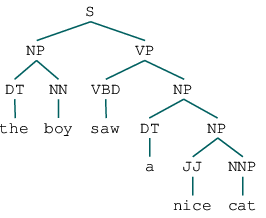

In [53]:
sent = "the boy saw a nice cat".split()
pi, bp = CKY(sent, non_terminals, terminals, smoothed_grammar_rule_probs)
#Write your code to display max probability and generate the parse tree

# max_prob = 0
# max_bp = None
# for i in non_terminals:
#     if (0,len(sent),i) in pi.keys():
#         prob = np.exp(pi[((0,len(sent),i))])
#         if prob > max_prob:
#             max_prob = prob
#             max_bp = (0,len(sent),i)
# print("---- Start ----")
# print(max_bp)
# print("---- max prob ----")
# print(max_prob)

# print("---- Tree ----")
# generate_parse_tree(bp,max_bp)            

# if the start label must be S, please use code below.
print("---- max prob ----")
print(pi[(0,len(sent),gr.Nonterminal('S'))])

print("---- Tree ----")
generate_parse_tree(bp,(0,len(sent),gr.Nonterminal('S')))


## Evaluate Our Parser

Now we can use the CKY algorithm implemented in Task 3 to predict parse trees on sentences from the test set, then evaluate the performance based on the gold parse trees of the test set. Before we perform the evaluation, we need to represent our parse trees in a form of constituents which are denoted as brackets $X(i, j)$, where $X$ is the non-terminal symbol **that has two children**, and $i$, $j$ refers to the starting point (inclusive) and ending point (exclusive) respectively. **(In other words, a constituent cannot consist of a single word only.)**

Metrics are defined as:
- Precision = (# of correct constituents in the predicted parse trees)/(# of total constituents in the predicted parse trees)

- Recall = (# of correct constituents in the predicted parse trees)/(# of correct constituents in the gold parse trees)

- F1 score = 2\*precision\*recall/(precision+recall)

Using the sentence "Fruit flies like a banana" as example again, there are five words in the sentence with labels from 0 to 4. Assume the constituents are $S(0, 5)$, $NP(0, 2)$, $VP(2, 5)$, $NP(3, 5)$ in the gold parse tree (shown in Task 3), and $S(0, 5)$, $NP(0, 2)$, $PP(2, 5)$, $NP(3, 5)$ in the predicted parse tree (shown below). Then the precision = 3/4, the recall = 3/4, and the F1 score = 0.75. 
![parse_tree](imgs/parse_tree2.png)

### Task 4 (6 points):
- Run the CKY algorithm on the test set and generate parse trees under the smoothed PCFG obtained in Task 2. Note that some test sentences contain words that are not included in the  list "terminals", set those words as $unk$.
- Extract the constituents from the gold and predicted parse trees respectively.
- Compute the overall precision, recall and F1 score for the test set.


In [ ]:
#Write your code here
len(cnf_trees_test)
pi_test = []
bp_test = []
tree_test = []

## start label must be S
print("-----Start process -----")
count = 0
for tt in cnf_trees_test:
    count +=1
    print("Current position: %s / %s" %(count,len(cnf_trees_test)))
    sentences = tt.leaves()
    pi, bp = CKY(sentences, non_terminals, terminals, smoothed_grammar_rule_probs)
    pi_test.append(pi)
    bp_test.append(bp)
    start = (0,len(sentences),gr.Nonterminal('S'))
    opt = generate_parse_tree(bp,start)
    tree_test.append(opt)
print("-----Process completed-----")

-----Start process -----
Current position: 1 / 24
Current position: 2 / 24
Current position: 3 / 24
Current position: 4 / 24
Current position: 5 / 24
Current position: 6 / 24
Current position: 7 / 24
Current position: 8 / 24
Current position: 9 / 24
Current position: 10 / 24
Current position: 11 / 24
Current position: 12 / 24
Current position: 13 / 24
Current position: 14 / 24
Current position: 15 / 24
Current position: 16 / 24
Current position: 17 / 24
Current position: 18 / 24
Current position: 19 / 24
Current position: 20 / 24
Current position: 21 / 24
Current position: 22 / 24


In [34]:
gold_tree = [] # one element: [S(0, 5), NP(0, 2), VP(2, 5), NP(3, 5)],[],[]
pred_tree = []
def get_subtree(tree,leave,sidx,eidx,tlist):
    if tree.height() == 2: # until it is non-terminal -> terminal rule
        return None
    
    temp_list = list(tree)
    
    # since if only has one child, it will return and each non-terminal rule must have two children ==> 
    lhs = temp_list[0]
    rhs = temp_list[1]
    if lhs.height() != 2: # do not add the non-terminal -> terminal rule into list which same as the given example
        tlist.append("%s(%s,%s)"%(lhs.label(),sidx,(sidx+len(lhs.leaves()))))
    if rhs.height() != 2:   
        tlist.append("%s(%s,%s)"%(rhs.label(),eidx - len(rhs.leaves()),eidx))
    get_subtree(lhs,leave,sidx,(sidx+len(lhs.leaves())),tlist)
    get_subtree(rhs,leave,eidx - len(rhs.leaves()),eidx,tlist) 
    return tlist

for t in cnf_trees_test:
    temp_list = []
    temp_list.append("%s(%s,%s)"%(t.label(),0,len(t.leaves())))
    temp_list = get_subtree(t,t.leaves(),0,len(t.leaves()),temp_list)
    gold_tree.append(temp_list)

for t in tree_test:
    temp_list = []
    temp_list.append("%s(%s,%s)"%(t.label(),0,len(t.leaves())))
    temp_list = get_subtree(t,t.leaves(),0,len(t.leaves()),temp_list)
    pred_tree.append(temp_list)
    
## print out the cons of first tree:
print("The constituents in first gold parse tree: ")
print(gold_tree[0])
print("-------------------------------------------")
print("The constituents in first predicted parse tree: ")
print(pred_tree[0])

11
25
14
42
16
29
28
17
13
22
15
9
17
11
21
12
23
7
26
26
20
28
15
25
The constituents in first gold parse tree: 
['S(0,12)', 'S(1,12)', 'S(2,12)', 'NP(2,4)', 'S(4,12)', 'VP(4,11)', 'VP(5,11)', 'VP(6,11)', 'PP(7,11)', 'NP(8,11)', 'NP(9,11)']
-------------------------------------------
The constituents in first predicted parse tree: 
['S(0,11)', 'S(1,11)', 'S(2,11)', 'NP(2,4)', 'S(4,11)', 'VP(4,10)', 'VP(5,10)', 'VP(6,10)', 'PP(6,10)', 'NP(7,10)', 'NP(8,10)']


In [35]:
cnf_trees_test[0].leaves()

['otherwise',
 ',',
 'actual',
 'profit',
 'is',
 'compared',
 '*-1',
 'with',
 'the',
 '300-day',
 'estimate',
 '.']

In [36]:
tree_test[0].leaves()

['otherwise',
 ',',
 'actual',
 'profit',
 'is',
 'compared',
 'with',
 'the',
 'unk',
 'estimate',
 '.']

In [28]:
#Precision = (# of correct constituents in the predicted parse trees)/(# of total constituents in the predicted parse trees)
#Recall = (# of correct constituents in the predicted parse trees)/(# of correct constituents in the gold parse trees)
#F1 score = 2*precision*recall/(precision+recall)

# # of total constituents in the predicted parse trees
total_in_pred = 0
for l in pred_tree:
    total_in_pred += len(l)
print("total constituents in the predicted parse trees: ", total_in_pred)

# # of correct constituents in the gold parse trees
total_in_gold = 0
for l in gold_tree:
    total_in_gold += len(l)
print("correct constituents in the gold parse trees: ", total_in_gold)

# number of correct constituents in the predicted parse trees
number_match = 0
for idx in range(len(pred_tree)):
    for pos in range(len(pred_tree[idx])):
        if pred_tree[idx][pos] in gold_tree[idx]:  ## once the cons is in gold_tree than plus one, do not care the order.
            number_match +=1
print("correct constituents in the predicted parse trees: ", number_match)

precision = number_match / total_in_pred
recall = number_match / total_in_gold
f1 = 2*precision*recall / (precision+recall)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

total constituents in the predicted parse trees:  466
correct constituents in the gold parse trees:  466
correct constituents in the predicted parse trees:  186
Precision:  0.39914163090128757
Recall:  0.39914163090128757
F1:  0.39914163090128757
